In [1]:
import sympy as sp
from sympy import init_printing
import numpy as np
import matplotlib.pyplot as plt

init_printing()

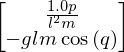

In [14]:
# Define the system
x = (sp.Matrix([sp.symbols('q p', real = True)])).T
m, l , g = sp.symbols('m l g', real = True)
H = 1/2 * x[1]**2 / (l**2 * m) + m*g*l*sp.sin(x[0])
dH = H.diff(x)
dx = sp.Matrix([[0, 1],[-1, 0]]) * dH
dx

In [40]:
# Taylor series
dx.taylor_term(1, x)

NonSquareMatrixError: 

In [33]:
dq = np.arange(0, 2*np.pi, np.pi/20)
dp = np.arange(-10, 10, 0.1)
DQ, DP = np.meshgrid(dq, dp)
# Make a func
dx_f = sp.lambdify((x[0], x[1]),dx.subs([(m, 1), (g, -9.81), (l, 1)]) )

In [84]:
dt = sp.symbols('t')
J = (sp.eye(2) + dt*dx.jacobian(x))
J_E = J.subs(([(m, 1), (g, -9.81), (l, 1), (dt, 0.1)]) )
e1, e2 = J_E.eigenvals().items()
eigenvals_n = sp.lambdify(x[0], np.array([e1[0], e2[0]]))

<string>:2: RuntimeWarning: invalid value encountered in sqrt


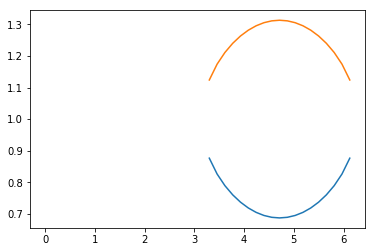

In [85]:
e1, e2 = eigenvals_n(dq)
plt.plot(dq, e1)
plt.plot(dq, e2)